In [4]:
from mhimport import *

In [88]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, KFold

In [5]:
lgreg = LogisticRegression

In [6]:
lgreg

sklearn.linear_model.logistic.LogisticRegression

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df = pd.read_csv('survey.csv')
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [9]:
df = df[['Age', 'Gender','self_employed', 'family_history','treatment','work_interfere','anonymity','leave','mental_health_consequence', 'benefits', 'coworkers', 'supervisor', 'mental_health_interview', 'mental_vs_physical', 'obs_consequence', 'care_options', 'remote_work','tech_company','wellness_program', 'seek_help']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 20 columns):
Age                          1259 non-null int64
Gender                       1259 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null object
mental_health_consequence    1259 non-null object
benefits                     1259 non-null object
coworkers                    1259 non-null object
supervisor                   1259 non-null object
mental_health_interview      1259 non-null object
mental_vs_physical           1259 non-null object
obs_consequence              1259 non-null object
care_options                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null ob

In [11]:
df.describe()

,Age
count,1259.00000
mean,79428148.31136
std,2818299442.98197
min,-1726.00000
25%,27.00000
50%,31.00000
75%,36.00000
max,99999999999.00000


In [12]:
df.head(391)

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
0,37,Female,NaN,No,Yes,Often,Yes,Somewhat easy,No,Yes,Some of them,Yes,No,Yes,No,Not sure,No,Yes,No,Yes
1,44,M,NaN,No,No,Rarely,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,Don't know,Don't know
2,32,Male,NaN,No,No,Rarely,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,No,Somewhat difficult,Yes,No,Some of them,No,Maybe,No,Yes,Yes,No,Yes,No,No
4,31,Male,NaN,No,No,Never,Don't know,Don't know,No,Yes,Some of them,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,42,Male,No,No,No,Never,Don't know,Don't know,No,Don't know,Some of them,Yes,Maybe,Don't know,No,Not sure,No,Yes,No,No
387,29,Nah,Yes,Yes,Yes,Sometimes,Don't know,Very difficult,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,No,No
388,25,female,No,No,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Don't know,Some of them,No,No,Don't know,No,Not sure,No,Yes,No,No
389,33,Female,No,Yes,Yes,Rarely,Yes,Don't know,Maybe,Yes,Some of them,No,No,Don't know,No,Yes,No,Yes,No,Yes


In [13]:
for age in df.Age.values:
    if age <= 17 or age >= 80:
        df.Age.replace(age, 1, inplace=True)

In [14]:
df.head(391)

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
0,37,Female,NaN,No,Yes,Often,Yes,Somewhat easy,No,Yes,Some of them,Yes,No,Yes,No,Not sure,No,Yes,No,Yes
1,44,M,NaN,No,No,Rarely,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,Don't know,Don't know
2,32,Male,NaN,No,No,Rarely,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,No,Somewhat difficult,Yes,No,Some of them,No,Maybe,No,Yes,Yes,No,Yes,No,No
4,31,Male,NaN,No,No,Never,Don't know,Don't know,No,Yes,Some of them,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,42,Male,No,No,No,Never,Don't know,Don't know,No,Don't know,Some of them,Yes,Maybe,Don't know,No,Not sure,No,Yes,No,No
387,29,Nah,Yes,Yes,Yes,Sometimes,Don't know,Very difficult,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,No,No
388,25,female,No,No,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Don't know,Some of them,No,No,Don't know,No,Not sure,No,Yes,No,No
389,33,Female,No,Yes,Yes,Rarely,Yes,Don't know,Maybe,Yes,Some of them,No,No,Don't know,No,Yes,No,Yes,No,Yes


In [15]:
df1 = df

In [16]:
df1.describe()

,Age
count,1259.00000
mean,31.87927
std,7.67357
min,1.00000
25%,27.00000
50%,31.00000
75%,36.00000
max,72.00000


In [17]:
for age in df.Age.values:
    if age == 1:
        df.Age.replace(age, df1['Age'].mean(), inplace=True)

In [18]:
df.head(391)

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
0,37.00000,Female,NaN,No,Yes,Often,Yes,Somewhat easy,No,Yes,Some of them,Yes,No,Yes,No,Not sure,No,Yes,No,Yes
1,44.00000,M,NaN,No,No,Rarely,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,Don't know,Don't know
2,32.00000,Male,NaN,No,No,Rarely,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No
3,31.00000,Male,NaN,Yes,Yes,Often,No,Somewhat difficult,Yes,No,Some of them,No,Maybe,No,Yes,Yes,No,Yes,No,No
4,31.00000,Male,NaN,No,No,Never,Don't know,Don't know,No,Yes,Some of them,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,42.00000,Male,No,No,No,Never,Don't know,Don't know,No,Don't know,Some of them,Yes,Maybe,Don't know,No,Not sure,No,Yes,No,No
387,29.00000,Nah,Yes,Yes,Yes,Sometimes,Don't know,Very difficult,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,No,No
388,25.00000,female,No,No,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Don't know,Some of them,No,No,Don't know,No,Not sure,No,Yes,No,No
389,33.00000,Female,No,Yes,Yes,Rarely,Yes,Don't know,Maybe,Yes,Some of them,No,No,Don't know,No,Yes,No,Yes,No,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 20 columns):
Age                          1259 non-null float64
Gender                       1259 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null object
mental_health_consequence    1259 non-null object
benefits                     1259 non-null object
coworkers                    1259 non-null object
supervisor                   1259 non-null object
mental_health_interview      1259 non-null object
mental_vs_physical           1259 non-null object
obs_consequence              1259 non-null object
care_options                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null 

In [20]:
df.Age = df.Age.fillna(32)

In [21]:
df.head(391)

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
0,37.00000,Female,NaN,No,Yes,Often,Yes,Somewhat easy,No,Yes,Some of them,Yes,No,Yes,No,Not sure,No,Yes,No,Yes
1,44.00000,M,NaN,No,No,Rarely,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,Don't know,Don't know
2,32.00000,Male,NaN,No,No,Rarely,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No
3,31.00000,Male,NaN,Yes,Yes,Often,No,Somewhat difficult,Yes,No,Some of them,No,Maybe,No,Yes,Yes,No,Yes,No,No
4,31.00000,Male,NaN,No,No,Never,Don't know,Don't know,No,Yes,Some of them,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,42.00000,Male,No,No,No,Never,Don't know,Don't know,No,Don't know,Some of them,Yes,Maybe,Don't know,No,Not sure,No,Yes,No,No
387,29.00000,Nah,Yes,Yes,Yes,Sometimes,Don't know,Very difficult,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,No,No
388,25.00000,female,No,No,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Don't know,Some of them,No,No,Don't know,No,Not sure,No,Yes,No,No
389,33.00000,Female,No,Yes,Yes,Rarely,Yes,Don't know,Maybe,Yes,Some of them,No,No,Don't know,No,Yes,No,Yes,No,Yes


In [22]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
0,37.00000,Female,NaN,No,Yes,Often,Yes,Somewhat easy,No,Yes,Some of them,Yes,No,Yes,No,Not sure,No,Yes,No,Yes
1,44.00000,M,NaN,No,No,Rarely,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,Don't know,Don't know
2,32.00000,Male,NaN,No,No,Rarely,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No
3,31.00000,Male,NaN,Yes,Yes,Often,No,Somewhat difficult,Yes,No,Some of them,No,Maybe,No,Yes,Yes,No,Yes,No,No
4,31.00000,Male,NaN,No,No,Never,Don't know,Don't know,No,Yes,Some of them,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.00000,male,No,No,Yes,NaN,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,Don't know,No,No,No,Yes,No,No
1255,32.00000,Male,No,Yes,Yes,Often,Yes,Somewhat difficult,No,Yes,Some of them,Yes,No,Yes,No,Yes,Yes,Yes,No,No
1256,34.00000,male,No,Yes,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No
1257,46.00000,f,No,No,No,NaN,Don't know,Don't know,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No


In [23]:
df.dropna()

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
18,46.00000,male,Yes,Yes,No,Sometimes,Yes,Very easy,No,Yes,Yes,Yes,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know
20,29.00000,Male,No,Yes,Yes,Sometimes,No,Somewhat difficult,Maybe,Yes,Some of them,Some of them,No,No,No,Yes,No,Yes,No,No
21,31.00000,male,Yes,No,No,Never,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Yes,No,No,Yes,Yes,No,No
22,46.00000,Male,No,No,Yes,Often,Don't know,Don't know,Maybe,Yes,Some of them,Yes,No,No,No,Yes,Yes,Yes,No,No
23,41.00000,Male,No,No,Yes,Never,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,No,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29.00000,male,No,Yes,Yes,Sometimes,Yes,Don't know,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,Yes,No
1253,36.00000,Male,No,Yes,No,Rarely,Don't know,Somewhat easy,Maybe,Don't know,Some of them,Some of them,No,Don't know,No,No,No,No,Yes,Yes
1255,32.00000,Male,No,Yes,Yes,Often,Yes,Somewhat difficult,No,Yes,Some of them,Yes,No,Yes,No,Yes,Yes,Yes,No,No
1256,34.00000,male,No,Yes,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No


In [24]:
df['Gender'] = df['Gender'].replace({'f':'F'})
df['Gender'] = df['Gender'].replace({'female':'F'})
df['Gender'] = df['Gender'].replace({'Male':'M'})
df['Gender'] = df['Gender'].replace({'male':'M'})
df['Gender'] = df['Gender'].replace({'Female':'F'})
df['Gender'] = df['Gender'].replace({'m':'M'})
df['Gender'] = df['Gender'].replace({'Make':'M'})
df['Gender'] = df['Gender'].replace({'Woman':'F'})
df['Gender'] = df['Gender'].replace({'Man':'M'})
df['Gender'] = df['Gender'].replace({'Femake':'F'})
df['Gender'] = df['Gender'].replace({'Malr':'M'})
df['Gender'] = df['Gender'].replace({'Mail':'M'})
df['Gender'] = df['Gender'].replace({'femail':'F'})
df['Gender'] = df['Gender'].replace({'Female ':'F'})
df['Gender'] = df['Gender'].replace({'Female (trans)':'trans'})
df['Gender'] = df['Gender'].replace({'Trans-female':'trans'})
df['Gender'] = df['Gender'].replace({'Trans woman':'trans'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'cis-female/femme':'F'})
df['Gender'] = df['Gender'].replace({'cis male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Man':'M'})
df['Gender'] = df['Gender'].replace({'maile':'M'}) 
df['Gender'] = df['Gender'].replace({'Mal':'M'})
df['Gender'] = df['Gender'].replace({'Cis Female':'F'})
df['Gender'] = df['Gender'].replace({'woman':'F'})
df['Gender'] = df['Gender'].replace({'Female (cis)':'F'})
df['Gender'] = df['Gender'].replace({'Male ':'M'})
df['Gender'] = df['Gender'].replace({'Male (CIS)':'M'})
df['Gender'] = df['Gender'].replace({'msle':'M'})
df['Gender'] = df['Gender'].replace({'queer/she/they':'queer'})
df['Gender'] = df['Gender'].replace({'queer':'queer'})
df['Gender'] = df['Gender'].replace({'Genderqueer':'queer'})
df['Gender'] = df['Gender'].replace({'fluid':'queer'})
df['Gender'] = df['Gender'].replace({'non-binary':'queer'})
df['Gender'] = df['Gender'].replace({'Androgyne':'queer'})
df['Gender'] = df['Gender'].replace({'male leaning androgynous':'queer'})
df['Gender'] = df['Gender'].replace({'Agender':'queer'})
df['Gender'] = df['Gender'].replace({'something kinda male?':'other'})
df['Gender'] = df['Gender'].replace({'Nah':'other'})
df['Gender'] = df['Gender'].replace({'Agender':'other'})
df['Gender'] = df['Gender'].replace({'Neuter':'other'})
df['Gender'] = df['Gender'].replace({'p':'other'})
df['Gender'] = df['Gender'].replace({'Guy (-ish) ^_^':'other'})
df['Gender'] = df['Gender'].replace({'Male-ish':'other'})
df['Gender'] = df['Gender'].replace({'A little about you':'other'})
df['Gender'] = df['Gender'].replace({'Enby':'other'})
df['Gender'] = df['Gender'].replace({'All':'other'})
df['Gender'] = df['Gender'].replace({'ostensibly male, unsure what that really means':'other'})

In [25]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
0,37.00000,F,NaN,No,Yes,Often,Yes,Somewhat easy,No,Yes,Some of them,Yes,No,Yes,No,Not sure,No,Yes,No,Yes
1,44.00000,M,NaN,No,No,Rarely,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,Don't know,Don't know
2,32.00000,M,NaN,No,No,Rarely,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No
3,31.00000,M,NaN,Yes,Yes,Often,No,Somewhat difficult,Yes,No,Some of them,No,Maybe,No,Yes,Yes,No,Yes,No,No
4,31.00000,M,NaN,No,No,Never,Don't know,Don't know,No,Yes,Some of them,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.00000,M,No,No,Yes,NaN,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,Don't know,No,No,No,Yes,No,No
1255,32.00000,M,No,Yes,Yes,Often,Yes,Somewhat difficult,No,Yes,Some of them,Yes,No,Yes,No,Yes,Yes,Yes,No,No
1256,34.00000,M,No,Yes,Yes,Sometimes,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No
1257,46.00000,F,No,No,No,NaN,Don't know,Don't know,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No


In [26]:
df.dropna(inplace = True)

In [27]:
cat_var = df.select_dtypes(include='object')
num_var = df.select_dtypes(exclude = 'object')

In [28]:
cat_var.drop(columns=['work_interfere'], inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
cat_var

,Gender,self_employed,family_history,treatment,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
18,M,Yes,Yes,No,Yes,Very easy,No,Yes,Yes,Yes,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know
20,M,No,Yes,Yes,No,Somewhat difficult,Maybe,Yes,Some of them,Some of them,No,No,No,Yes,No,Yes,No,No
21,M,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Yes,No,No,Yes,Yes,No,No
22,M,No,No,Yes,Don't know,Don't know,Maybe,Yes,Some of them,Yes,No,No,No,Yes,Yes,Yes,No,No
23,M,No,No,Yes,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,No,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,M,No,Yes,Yes,Yes,Don't know,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,Yes,No
1253,M,No,Yes,No,Don't know,Somewhat easy,Maybe,Don't know,Some of them,Some of them,No,Don't know,No,No,No,No,Yes,Yes
1255,M,No,Yes,Yes,Yes,Somewhat difficult,No,Yes,Some of them,Yes,No,Yes,No,Yes,Yes,Yes,No,No
1256,M,No,Yes,Yes,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['work_interfere',]), 
                                    df.work_interfere, test_size=0.40, random_state=7)

In [38]:
ohc = OneHotEncoder(drop='first')
array_to_df = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

In [39]:
encoded=pd.DataFrame(array_to_df, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

In [40]:
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

(586, 35)

In [41]:
clean_X_train

,Age,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,anonymity_No,anonymity_Yes,...,mental_vs_physical_Yes,obs_consequence_Yes,care_options_Not sure,care_options_Yes,remote_work_Yes,tech_company_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes
0,33.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000
1,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000
2,50.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000
3,37.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
4,34.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,36.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000
582,29.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
583,43.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
584,28.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000


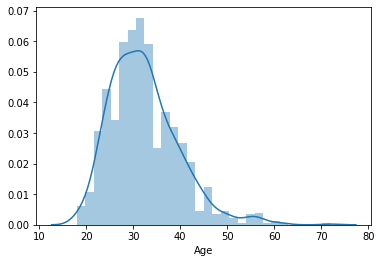

In [42]:
sns.distplot(df.Age)
plt.show()

In [43]:
df.Age.mean()

32.30427391562734

In [44]:
clean_X_train.sort_values(by =['Age'])

,Age,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,anonymity_No,anonymity_Yes,...,mental_vs_physical_Yes,obs_consequence_Yes,care_options_Not sure,care_options_Yes,remote_work_Yes,tech_company_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes
317,18.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000
543,18.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000
407,19.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000
540,19.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000
383,19.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,57.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000
512,57.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000
309,60.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000
46,61.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000


In [45]:
df.work_interfere

18      Sometimes
20      Sometimes
21          Never
22          Often
23          Never
          ...    
1252    Sometimes
1253       Rarely
1255        Often
1256    Sometimes
1258    Sometimes
Name: work_interfere, Length: 977, dtype: object

In [46]:
df.work_interfere.replace({'Often': 'Yes', 'Sometimes': 'Yes', 'Never': 'No', 'Rarely': 'No'}, inplace = True)

In [47]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,anonymity,leave,mental_health_consequence,benefits,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,care_options,remote_work,tech_company,wellness_program,seek_help
18,46.00000,M,Yes,Yes,No,Yes,Yes,Very easy,No,Yes,Yes,Yes,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know
20,29.00000,M,No,Yes,Yes,Yes,No,Somewhat difficult,Maybe,Yes,Some of them,Some of them,No,No,No,Yes,No,Yes,No,No
21,31.00000,M,Yes,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Yes,No,No,Yes,Yes,No,No
22,46.00000,M,No,No,Yes,Yes,Don't know,Don't know,Maybe,Yes,Some of them,Yes,No,No,No,Yes,Yes,Yes,No,No
23,41.00000,M,No,No,Yes,No,Don't know,Don't know,Maybe,Don't know,No,No,No,Don't know,No,No,No,No,No,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29.00000,M,No,Yes,Yes,Yes,Yes,Don't know,Yes,Yes,Some of them,No,No,No,No,Yes,Yes,Yes,Yes,No
1253,36.00000,M,No,Yes,No,No,Don't know,Somewhat easy,Maybe,Don't know,Some of them,Some of them,No,Don't know,No,No,No,No,Yes,Yes
1255,32.00000,M,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,Yes,Some of them,Yes,No,Yes,No,Yes,Yes,Yes,No,No
1256,34.00000,M,No,Yes,Yes,Yes,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No


In [48]:
df.work_interfere.value_counts(normalize=True)

Yes   0.61412
No    0.38588
Name: work_interfere, dtype: float64

In [52]:
y.value_counts()

Yes    600
No     377
Name: work_interfere, dtype: int64

One Hot Encoding

In [58]:
cat_var = df.select_dtypes(include='object')
num_var = df.select_dtypes(exclude = 'object')

In [59]:
cat_var.drop(columns=['work_interfere'], inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['work_interfere',]), 
                                    df.work_interfere, test_size=0.40, random_state=7)

In [62]:
encoded=pd.DataFrame(array_to_df, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

In [63]:
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

(586, 35)

Logistic Regression

In [68]:
X = clean_X_train
y = y_train

In [70]:
logreg = LogisticRegression()
logmodel = logreg.fit(X, y)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
logmodel.classes_

array(['No', 'Yes'], dtype=object)

In [74]:
logreg.score(X, y)

0.7320819112627986

Random Forest

In [77]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
forest.score(X, y)

0.7832764505119454

SVM

In [84]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [85]:
clf.score(X, y)

0.726962457337884

KFold Cross Validation Random Forest

In [110]:
print(cross_val_score(forest, X, y, scoring='accuracy', cv = 10).mean()*100)

73.36917981687124


KFold Cross Validation Logistic Regression

In [109]:
print(cross_val_score(logreg, X, y, scoring='accuracy', cv = 10).mean()*100)

70.2775180206507


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

KFold Cross Validation SVM

In [108]:
print(cross_val_score(clf, X, y, scoring='accuracy', cv = 10).mean()*100)

72.70261055912722
